# Sequences

## Task 1

Write a function that for the sequence
\begin{align*}
A_{n} &= \dfrac{(-1)^{n} *4 n}{n^{2} + 2} \\[12pt]
B_{n} &= \dfrac{(-1)^{n} *4 n}{n + 2}
\end{align*}

In [1]:
A <- function(n){
 return(((-1)^n*4*n)/(n^2+2))
}

B <- function(n){
    return(((-1)^n*4*n)/(n+2))
}

## Task 2

Create a vector of all sequence values $A_n$ and $B_n$ for $n \in [1,100]$ while $n \in \mathbb{N}$.

In [2]:
An <- A(seq(1,100,1))
Bn <- B(seq(1,100,1))

## Task 3

Write a function that takes as input arguments a sequence-generating function (here A or B) as well as threshold-value $\varepsilon$. The function should then determine, whether the sequence converges or not and, if so, return the limiting value of the sequence. 

For the purpose of this function, and similar to the Cauchy criterion, we define that a sequence converges if the following two characteristics are fulfilled:
- the absolute value of the difference of the direct successor within the sequence is smaller than the threshold value, i.e. $|a_{n+1} - a_{n}|<\varepsilon$.
- the absolute value of the difference of the 100$^{\text{th}}$ successor within the sequence is smaller than the threshold value, i.e. $|a_{n+100} - a_{n}|<\varepsilon$.

The point for which these two characterstics are fulfilled, we call $n_{\varepsilon}$.

Furthermore, we define for this function that a sequence is taxed as diverging if after $10^6$ iterations the above characteristisc are not fulfilled. 

In order to determine the limiting value, evaluate the sequence $10^4$ steps after $n_{\varepsilon}$.

In the case that your function converges, it should return the a list with the limiting value as well as the point $n_{\varepsilon}$. In the case that it does not converge, the limiting value returned should be the string "Error" and $n_{\varepsilon} = -1$.


In [3]:
# todo
limes <- function(fn,epsl){
    n <- err1 <- err2  <- 1
    while((err1 > epsl)|(err2 >epsl)){
        n = n+1
        err1 = abs(fn(n+1)-fn(n))
        err2 = abs(fn(n+100)-fn(n))
        lim = fn(n+10**4)
        if (n > 10**(6)){
            print("Sequence did not converge!")
            n = -1
            lim="Error"
            break 
        }
    }
    return(list(Grenzwert=lim,n=n))

}

epsl = 0.4
limes(A,epsl)
limes(B,epsl)

$Grenzwert
[1] 0.0003992016

$n
[1] 20

[1] "Sequence did not converge!"


$Grenzwert
[1] "Error"

$n
[1] -1

## Task 4
Plot the sequence $A_n$. Draw the limiting value $\lim_{n \to \infty} a_n = a$, which the function from Task 3 has determined into the graph. Use a thresholdvalue $\varepsilon= 0.4$. Shade the area $[a-\varepsilon,a+\varepsilon]$ grey. Also highlight the value from which on the convergence criteria (that your function uses) are satisfied i.e. $n>n_\varepsilon$.

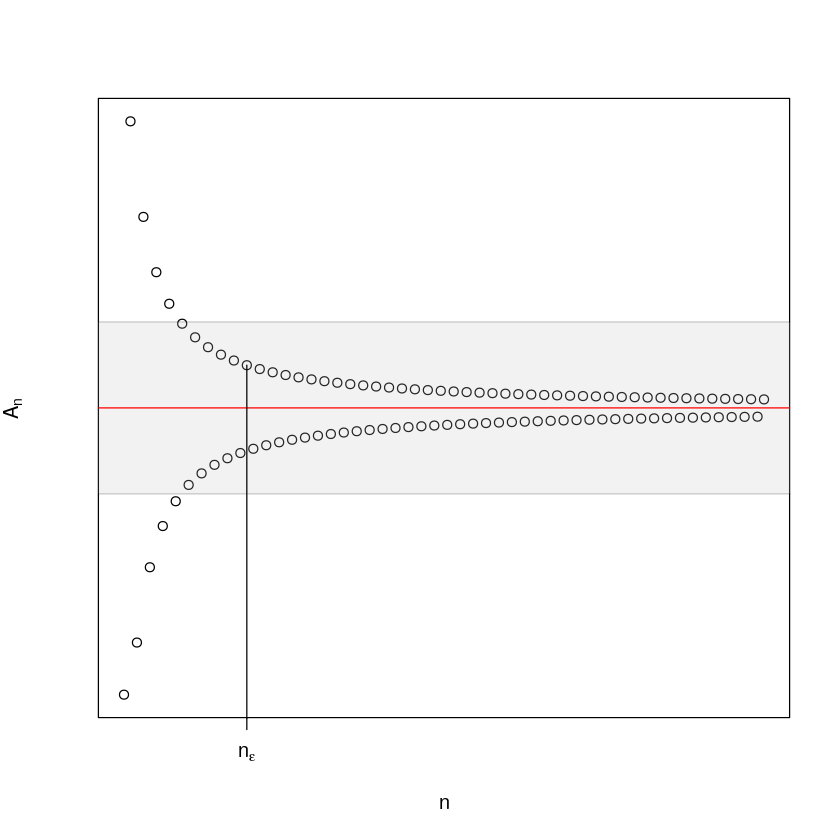

In [29]:
n <- 1:1:100
An <- A(n)
epsilon <- 0.4
lim <- limes(A,epsilon)
a <- lim$Grenzwert
n_epsilon <- lim$n

plot(n,An,ylab=expression(A[n]),xlab="n",yaxt='n',xaxt='n')
polygon(x=c(-0.1*n[length(n)],1.1*n[length(n)],n[length(n)]*1.1,-10),
        y=c(a+epsilon,a+epsilon,a-epsilon,a-epsilon),
        col=adjustcolor("gray",alpha.f=0.2),border=adjustcolor("black",alpha.f=0.2))
abline(h=a,col="red")
lines(x=c(n_epsilon,n_epsilon),y=c(-100,A(n_epsilon)),col="black")
axis(side =1, n_epsilon, labels = expression(n[epsilon]))



## Task 5

Write a function that takes as input arguments a sequence-generating function, a threshold value $\varepsilon$ and an upper limit for $n$ up to which the sequence should be plotted. The function should have no return value but produce a graph like in task 4.

Test the function for the sequence:

\begin{align*}
C_n = 1+\frac{1}{n}
\end{align*}

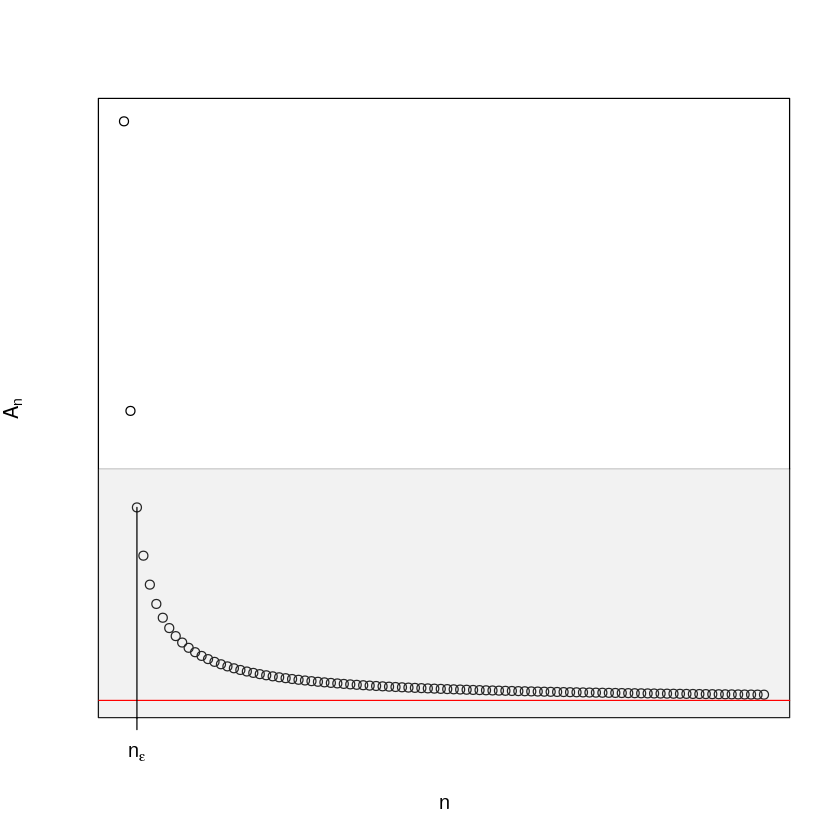

In [30]:
C <- function(n){
 return(1+1/n)
}

plot_sequence <- function(S,epsilon,nlim){
    n <- 1:1:nlim
    Sn <- S(n)
    lim <- limes(S,epsilon)
    a <- lim$Grenzwert
    n_epsilon <- lim$n

    plot(n,Sn,ylab=expression(A[n]),xlab="n",yaxt='n',xaxt='n')
    polygon(x=c(-0.1*n[length(n)],n[length(n)]*1.1,n[length(n)]*1.1,-10),
            y=c(a+epsilon,a+epsilon,a-epsilon,a-epsilon),
            col=adjustcolor("gray",alpha.f=0.2),border=adjustcolor("black",alpha.f=0.2))
    abline(h=a,col="red")
    lines(x=c(n_epsilon,n_epsilon),y=c(-100,S(n_epsilon)),col="black")
    axis(side =1, n_epsilon, labels = expression(n[epsilon]))
}

eps <- 0.4
plot_sequence(C,eps,100)



## Task 6

Use the function you just have created to plot the geometrical series $q = \frac{1}{1.02}$ for partial sums up to $ n = 1000$. <br>

\begin{align*}
S_{n} = \sum\limits_{k=0}^{n}\left(\frac{1}{1.02}\right)^{k}
\end{align*}

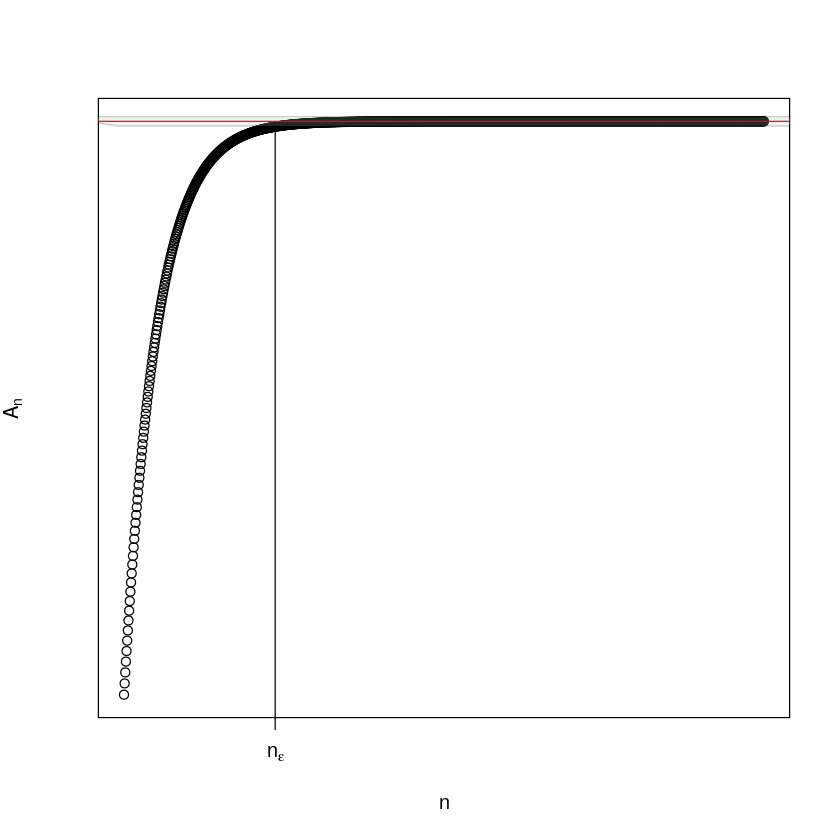

In [31]:
G <- function(n){
    series <- matrix(length(n),1)
    # Handle case where only one series realization is wanted
    if (length(n)==1){
        series <- sum((1.02)^(-seq(1,n)))   
    }else{
        # Handle case where several realizations are wanted
        for (nn in n){
            series[nn] <- sum((1.02)^(-seq(1,nn)))
        }  
    }

    return(series)    
}
eps <- 0.4
plot_sequence(G,eps,1000)
